In [1]:
# k最近傍法
import mglearn 
import matplotlib.pyplot as plt
# matplotlib inline

In [2]:
# pip install mglearn

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


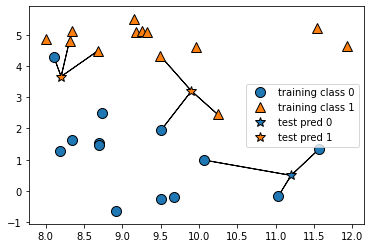

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [4]:
# 2値分類データ
X, y = mglearn.datasets.make_forge()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [49]:
print(X)
print(X.shape)
print(y)
print(y.shape)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
(26, 2)
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
(26,)


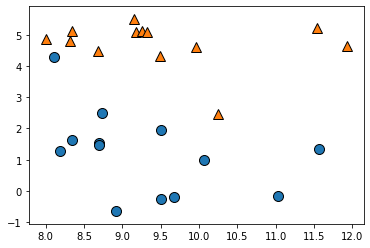

In [9]:
# X[:,0]すべての行は:、列は0で指定。yの値に基づいて分類図作成
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [13]:
print(X_train)
print(X_train.shape)
print(X_test.shape)

array([[ 8.92229526, -0.63993225],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [ 7.99815287,  4.8525051 ],
       [11.0329545 , -0.16816717],
       [ 9.17748385,  5.09283177],
       [11.563957  ,  1.3389402 ],
       [ 9.15072323,  5.49832246],
       [ 8.34810316,  5.13415623],
       [11.93027136,  4.64866327],
       [ 8.1062269 ,  4.28695977],
       [ 8.67494727,  4.47573059],
       [ 9.67284681, -0.20283165],
       [ 9.50169345,  1.93824624],
       [ 8.69289001,  1.54322016],
       [ 9.96346605,  4.59676542],
       [ 9.50048972, -0.26430318],
       [ 9.25694192,  5.13284858],
       [ 8.68937095,  1.48709629]])

In [54]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train,y_train)
print(clf.predict(X_train))

[0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0]


In [53]:
print(y_train)
print(clf.predict(X_test))
print(y_test)
print("{:.3f}".format(clf.score(X_test,y_test)))

[0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0]
[1 0 1 0 1 0 0]
[1 0 1 0 1 1 0]
0.857


In [47]:
clf_10 = KNeighborsClassifier(n_neighbors = 10).fit(X_train,y_train)
print("{:.3f}".format(clf_10.score(X_test,y_test)))

0.857


In [55]:
for n_neighbors in range(1,16):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X_train,y_train)
    print("n_neighbors={}, テストスコア={:.3f}".format(n_neighbors,clf.score(X_test,y_test)))

n_neighbors=1, テストスコア=0.857
n_neighbors=2, テストスコア=0.857
n_neighbors=3, テストスコア=0.857
n_neighbors=4, テストスコア=0.857
n_neighbors=5, テストスコア=0.857
n_neighbors=6, テストスコア=0.857
n_neighbors=7, テストスコア=0.857
n_neighbors=8, テストスコア=0.857
n_neighbors=9, テストスコア=0.857
n_neighbors=10, テストスコア=0.857
n_neighbors=11, テストスコア=0.857
n_neighbors=12, テストスコア=0.857
n_neighbors=13, テストスコア=0.857
n_neighbors=14, テストスコア=0.857
n_neighbors=15, テストスコア=0.857


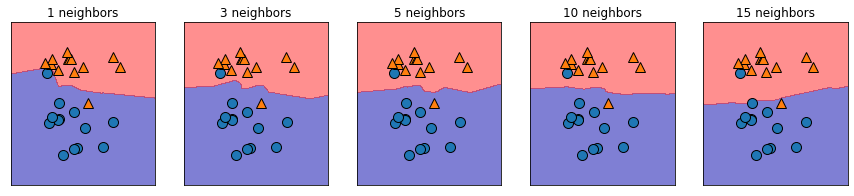

In [66]:
fig, ax = plt.subplots(1,5,figsize = (15,3))
print(ax)
# axはタブの役割
for neighbors, ax in zip([1,3,5,10,15], ax):
    #モデル作成、1,3,5,・・・     
    clf = KNeighborsClassifier(n_neighbors = neighbors).fit(X_train,y_train)
    #境界線の描画　plot_2d_separator     
    mglearn.plots.plot_2d_separator(clf,X,fill=True,ax = ax, alpha = 0.5)
    #散布図の描画     
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbors".format(neighbors))
    
plt.show()

In [68]:
# sampleデータ取得
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [74]:
cancer.data.shape

(569, 30)

In [77]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [79]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

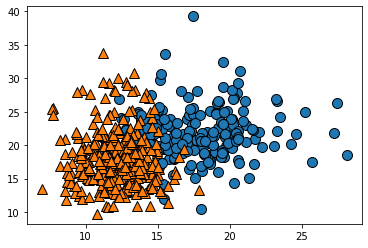

In [81]:
# cancer.targetを予測する
mglearn.discrete_scatter(cancer.data[:,0],cancer.data[:,1],cancer.target)

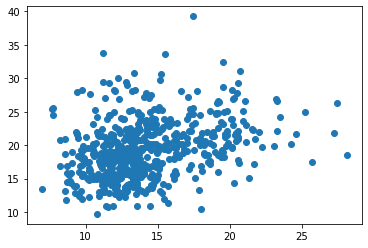

In [84]:
# pltヴァージョン
plt.scatter(cancer.data[:,0],cancer.data[:,1])
plt.show()

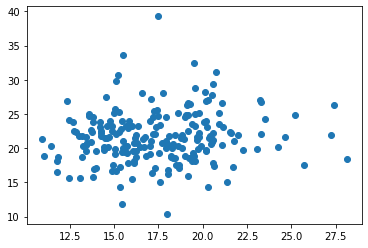

In [87]:
x_1_blue = cancer.data[:,0][cancer.target == 0]
x_2_blue = cancer.data[:,1][cancer.target == 0]
plt.scatter(x_1_blue,x_2_blue)

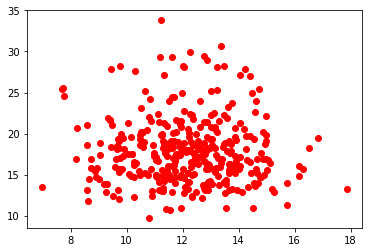

In [92]:
x_1_red = cancer.data[:,0][cancer.target == 1]
x_2_red = cancer.data[:,1][cancer.target == 1]
plt.scatter(x_1_red,x_2_red,c = 'red')

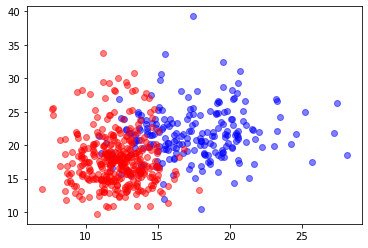

In [95]:
plt.scatter(x_1_blue,x_2_blue,c = 'blue',alpha = 0.5)
plt.scatter(x_1_red,x_2_red,c = 'red',alpha = 0.5)

In [99]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state = 0)

In [110]:
print(y_train.shape)
print(x_train.shape)

clf = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train.ravel())
clf.predict(x_test)

(426,)
(426, 30)


array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [113]:
y_test == clf.predict(x_test)

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [114]:
clf.score(x_test,y_test)

0.916083916083916